In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the data
file_path = "insurance_data.csv"
insurance_data = pd.read_csv(file_path)

# Display the first 10 rows of the data
print("First 10 rows of the data:")
print(insurance_data.head(10))

First 10 rows of the data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692



5-point summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Information about the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 

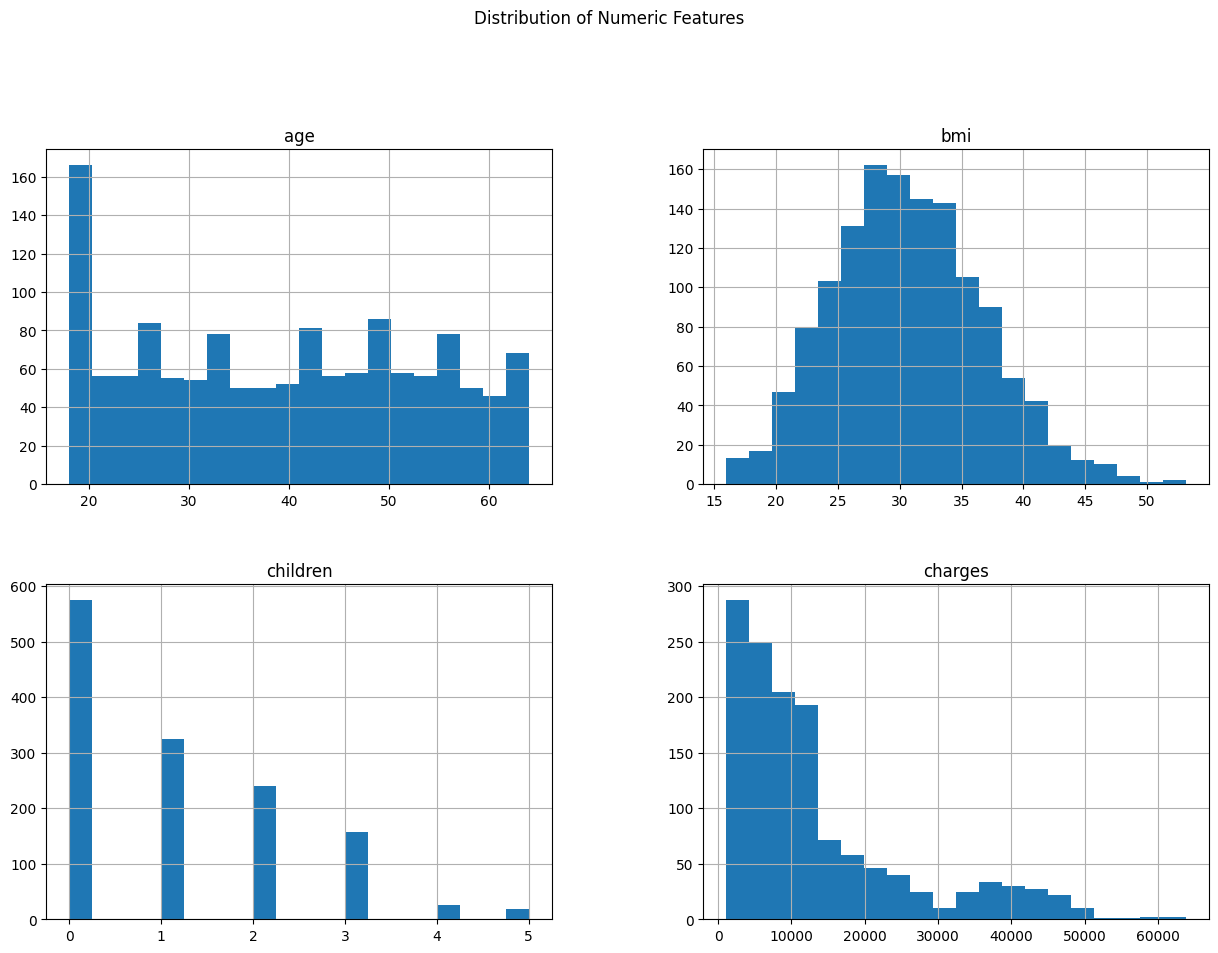

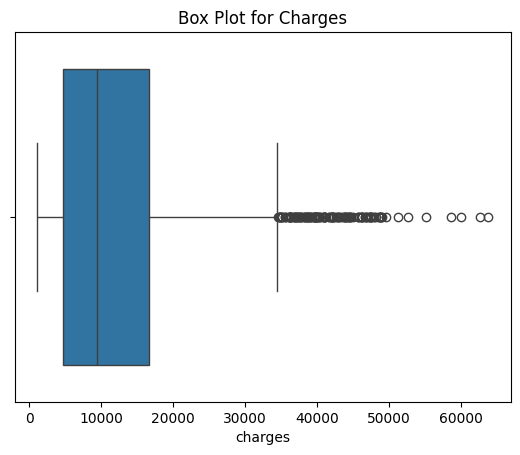

In [2]:
# Display 5-point summary
print("\n5-point summary:")
print(insurance_data.describe())

# Information about the columns
print("\nInformation about the columns:")
print(insurance_data.info())

# Number of outliers (assuming 'age' is a numeric column)
outliers_age = insurance_data[(insurance_data['age'] < insurance_data['age'].quantile(0.25) - 1.5 * (insurance_data['age'].quantile(0.75) - insurance_data['age'].quantile(0.25))) |
                              (insurance_data['age'] > insurance_data['age'].quantile(0.75) + 1.5 * (insurance_data['age'].quantile(0.75) - insurance_data['age'].quantile(0.25)))]

print("\nNumber of outliers:")
print(len(outliers_age))

# Correlation between numeric variables
numeric_columns = insurance_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = insurance_data[numeric_columns].corr()

print("\nCorrelation between variables:")
print(correlation_matrix)

# Distribution of the data
numeric_columns = insurance_data.select_dtypes(include=['float64', 'int64']).columns
insurance_data[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.show()

# Box plot for 'charges'
sns.boxplot(x=insurance_data['charges'])
plt.title("Box Plot for Charges")
plt.show()

# Feature engineering - Encode categorical features
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Impute missing values
insurance_data.fillna(insurance_data.mean(), inplace=True)

In [3]:
# Split the data into 80% training and 20% testing
X = insurance_data.drop("charges", axis=1)
y = insurance_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predictions
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

# Evaluate using RMSE and R-squared
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nRMSE - Train:", rmse_train)
print("RMSE - Test:", rmse_test)
print("\nR-squared - Train:", r2_train)
print("R-squared - Test:", r2_test)


RMSE - Train: 6105.545160099847
RMSE - Test: 5796.284659276273

R-squared - Train: 0.7417255854683333
R-squared - Test: 0.7835929767120724


In [5]:
# Display the equation of the model
equation = "y = {:.2f}".format(linear_reg_model.intercept_)
for i, coef in enumerate(linear_reg_model.coef_):
    equation += " + {:.2f} * {}".format(coef, X.columns[i])

print("\nEquation of the model:")
print(equation)


Equation of the model:
y = -11931.22 + 256.98 * age + 337.09 * bmi + 425.28 * children + -18.59 * sex_male + 23651.13 * smoker_yes + -370.68 * region_northwest + -657.86 * region_southeast + -809.80 * region_southwest


In [6]:
# Identify significant and insignificant variables based on p-values or feature importance

coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': linear_reg_model.coef_})
significant_variables = coefficients[coefficients['Coefficient'] != 0]
insignificant_variables = coefficients[coefficients['Coefficient'] == 0]

print("\nSignificant Variables:")
print(significant_variables)

print("\nInsignificant Variables:")
print(insignificant_variables)


Significant Variables:
           Variable   Coefficient
0               age    256.975706
1               bmi    337.092552
2          children    425.278784
3          sex_male    -18.591692
4        smoker_yes  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354

Insignificant Variables:
Empty DataFrame
Columns: [Variable, Coefficient]
Index: []


In [7]:
import pickle

# Assuming linear_reg_model is the best model
best_model = linear_reg_model

# Pickle the best model
with open("Insurance_Data_Linear_Regression_Model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)